## Loading the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = 'AppleGothic'  
plt.rcParams['axes.unicode_minus'] = False    

In [3]:
d = {}

for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

read csv adj_close ...
done!  (2278, 582)
read csv mc ...
done!  (2278, 582)
read csv sales ...
done!  (2278, 582)
read csv op ...
done!  (2278, 582)
read csv ni ...
done!  (2278, 582)
read csv liab ...
done!  (2278, 582)
read csv eq ...
done!  (2278, 582)


## Data Information

* Data file: stock.{table_name}.csv
* Data time frame: 2018-06-01 ~ 2020-10-14 
* Number of stocks: 2,278
* The currency of the data is in Won (South Korea Currency)
* Explanation of each dataset
  * `stock.adj_close.csv`: the adjusted closing price for each stock.
  * `stock.mc.csv`: the market capitalization in millions of Won 
  * `stock.sales.csv`: the sales revenue in millions of Won 
  * `stock.op.csv`: the operating profit in millions of Won
  * `stock.ni.csv`: the net income in millions of Won 
  * `stock.liab.csv`: the liabilities in millions of Won
  * `stock.eq.csv`: the equity in millions of Won
  * `stock.itemname.csv`: the stock code and the item name
  * `stock.sector.csv`: the stock code and the sector

In [4]:
d['adj_close']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,3820.0,3900.0,4050.0,4070.0,4190.0,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12400.0,12800.0,12900.0,12800.0,12850.0,13050.0,13050.0,12900.0,12650.0,13350.0


In [5]:
d['mc']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,322608.0,328195.0,326798.0,325402.0,321212.0,321212.0,325402.0,335178.0,329591.0,319815.0,...,617300.0,614500.0,610300.0,673100.0,663400.0,656400.0,674500.0,670400.0,678700.0,666200.0
A000030,10478000.0,10782200.0,10849800.0,11154000.0,11221600.0,11255400.0,11390600.0,11154000.0,10883600.0,11052600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000040,88263.0,89101.0,89221.0,90538.0,89820.0,88023.0,87784.0,89460.0,89460.0,88981.0,...,70700.0,68100.0,70300.0,76000.0,74200.0,78800.0,79100.0,79100.0,77900.0,80100.0
A000050,361882.0,371477.0,372848.0,378331.0,378331.0,378331.0,374218.0,379701.0,397521.0,398892.0,...,294700.0,287900.0,289200.0,297500.0,298800.0,298800.0,301600.0,301600.0,297500.0,296100.0
A000060,2212277.0,2212277.0,2223311.0,2212277.0,2250895.0,2223311.0,2283997.0,2311581.0,2223311.0,2306064.0,...,1449400.0,1449400.0,1460800.0,1494900.0,1511900.0,1517600.0,1580200.0,1585800.0,1557400.0,1540400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,2350704.0,2216726.0,2213681.0,2356794.0,2448142.0,2390288.0,2332434.0,2335479.0,2375063.0,2291614.0,...,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0
A950170,484826.0,498829.0,505830.0,500579.0,495328.0,477825.0,491828.0,476075.0,474325.0,416566.0,...,133700.0,136500.0,141800.0,142500.0,146700.0,145600.0,151200.0,155600.0,155400.0,151700.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261200.0,269600.0,271700.0,269600.0,270600.0,274900.0,274900.0,271700.0,266400.0,281200.0


In [6]:
d['sales']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,...,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05
A000030,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,...,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06
A000040,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,...,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05
A000050,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,...,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05
A000060,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,...,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
d['op']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,...,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04
A000030,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,...,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,...,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04
A000060,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,...,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
d['ni']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,...,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04
A000030,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,...,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,...,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04
A000060,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,...,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d['liab']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,...,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04
A000030,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,...,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08
A000040,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,...,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05
A000050,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,...,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05
A000060,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,...,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
d['eq']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,...,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05
A000030,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,...,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07
A000040,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,...,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04
A000050,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,...,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05
A000060,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,...,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

stock_info = pd.concat([itemname, sector], axis=1)

stock_info
#The item name is in Korean, but I will translate the item names we use in the analysis into English.

,itemname,Sector
Symbol,,
A000020,동화약품,Health_Care
A000030,우리은행,NaN
A000040,KR모터스,Consumer_Discretionary
A000050,경방,Consumer_Discretionary
A000060,메리츠화재,Financials
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


## Stock Data Analysis & EDA (Exploratory Data Analysis)

Let's pick one specific stock to explore the data deeper. We will choose `Samsung Electronics`. 

In [13]:
code = "A005930"
codename = stock_info.loc[code, 'itemname']
code, codename

('A005930', '삼성전자')

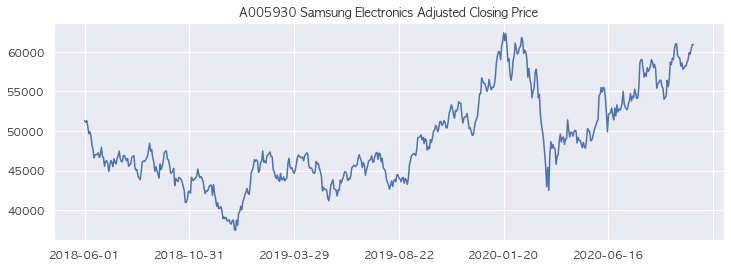

In [15]:
# The adjusted closing price for Samsung Electronics
d['adj_close'].loc[code, :].plot(figsize=(12,4), title=f'{code} Samsung Electronics Adjusted Closing Price');

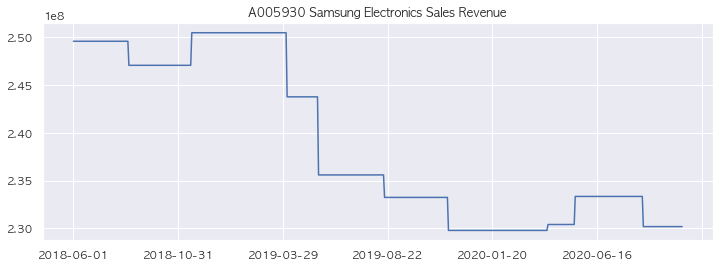

In [16]:
#The sales revenue for Samsung Electronics
d['sales'].loc[code, :].plot(figsize=(12,4), title=f'{code} Samsung Electronics Sales Revenue');

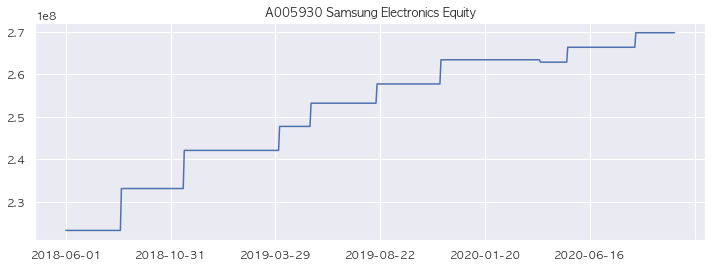

In [17]:
#The equity for Samsung Electronics
d['eq'].loc[code, :].plot(figsize=(12,4), title=f'{code} Samsung Electronics Equity');

### Drawing Moving Average Line for Samsung Electronics using .rolling() function

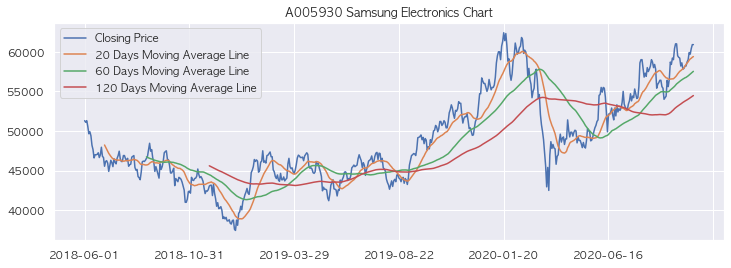

In [18]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), label='Closing Price');
d['adj_close'].loc[code, :].rolling(20).mean().plot(label='20 Days Moving Average Line');
d['adj_close'].loc[code, :].rolling(60).mean().plot(label='60 Days Moving Average Line');
d['adj_close'].loc[code, :].rolling(120).mean().plot(label='120 Days Moving Average Line');

plt.title(f"{code} Samsung Electronics Chart")
plt.legend();

### Calculating the percentage of each sector in the entire stock market

In [19]:
# Picking the date 
view_date = '2020-10-14'

In [20]:
# The overall market capitalization on 10/14/2020
d['mc'].loc[:,view_date]

Symbol
A000020     666200.0
A000030          NaN
A000040      80100.0
A000050     296100.0
A000060    1540400.0
             ...    
A950160     489600.0
A950170     151700.0
A950180     281200.0
A950190     366100.0
A950200     267800.0
Name: 2020-10-14, Length: 2278, dtype: float64

In [21]:
# The sector information by item
stock_info.loc[:,'Sector']

Symbol
A000020               Health_Care
A000030                       NaN
A000040    Consumer_Discretionary
A000050    Consumer_Discretionary
A000060                Financials
                    ...          
A950160                       NaN
A950170                       NaN
A950180                       NaN
A950190                       NaN
A950200                       NaN
Name: Sector, Length: 2278, dtype: object

In [22]:
# concating two dataset (market capitalization & sector)
name_sector_mc_df = pd.concat([stock_info, d['mc'].loc[:,view_date]], axis=1)
name_sector_mc_df

,itemname,Sector,2020-10-14
Symbol,,,
A000020,동화약품,Health_Care,666200.0
A000030,우리은행,NaN,NaN
A000040,KR모터스,Consumer_Discretionary,80100.0
A000050,경방,Consumer_Discretionary,296100.0
A000060,메리츠화재,Financials,1540400.0
...,...,...,...
A950160,코오롱티슈진,NaN,489600.0
A950170,JTC,NaN,151700.0
A950180,SNK,NaN,281200.0


In [23]:
# Summing the market capitalization by sector using groupby()
sector_mc_df = name_sector_mc_df.groupby('Sector').sum().sort_values(view_date)
sector_mc_df

,2020-10-14
Sector,
Real_Estate,2209400.0
Utilities,19979400.0
Communication_Services,53689900.0
Energy,55118900.0
Consumer_Staples,97112100.0
Financials,119876000.0
Materials,153872500.0
Consumer_Discretionary,178724900.0
Industrials,199103300.0


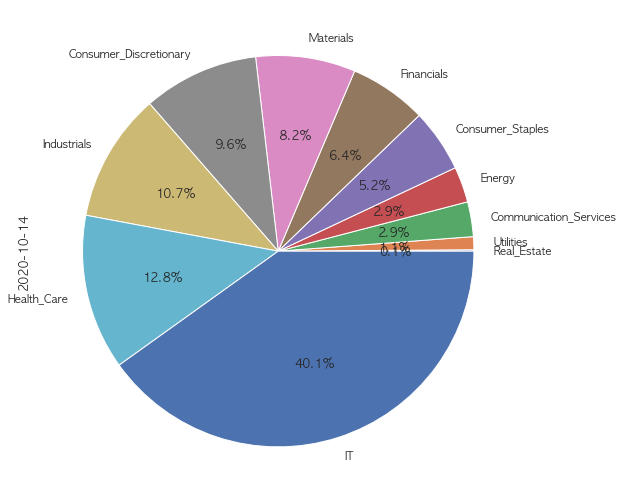

In [24]:
# Drawing pie-chart 
sector_mc_df.plot(kind='pie', y=view_date, figsize=(15,9), legend=False, autopct='%1.1f%%');

We can see that the Information Technology holds the largest portion, whereas the Real Estate sector takes the smallest portion. 

In [25]:
# Checking which items are on the list for the IT sector
name_sector_mc_df.query('Sector == "IT"')

,itemname,Sector,2020-10-14
Symbol,,,
A000660,SK하이닉스,IT,62972200.0
A000670,영풍,IT,880500.0
A000990,DB하이텍,IT,1605000.0
A001210,금호전기,IT,56700.0
A001390,KG케미칼,IT,257700.0
...,...,...,...
A336260,두산퓨얼셀,IT,2577700.0
A336370,두산솔루스,IT,1134900.0
A347890,엠투아이,IT,128900.0


The items that are on the list are A000660 (SK Hynix), A000670 (Young Poong), A000990 (DB Hitek), A001210 (Kumho Electric), A001390 (KG Chemical), A336260 (Doosan Fuel Cell), A336370 (Solus Advanced Materials), A347890 (M2I), A353200 (Daeduck Electronics), and A357780 (Soul Brain).

### Which sector has the best earning rate? Which industry has the best earning rate? 

We will use `.pct_change()` to calculate the volatility of the stock. 

In [26]:
# checking the data
d['adj_close'].head()

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0


In [27]:
# the stock volatility for 1 day 
d['adj_close'].pct_change(periods=1, axis=1)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,0.017316,-0.004255,-0.004274,-0.012876,0.000000,0.013043,0.030043,-0.016667,-0.029661,...,0.047393,-0.004525,-0.006818,0.102975,-0.014523,-0.010526,0.027660,-0.006211,0.012500,-0.018519
A000030,NaN,0.029032,0.006270,0.028037,0.006061,0.003012,0.012012,-0.020772,-0.024242,0.015528,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.009693,0.001324,0.014545,-0.007820,-0.020033,-0.002681,0.019153,0.000000,-0.005275,...,-0.007722,-0.036316,0.032301,0.080834,-0.022919,0.061728,0.003488,0.000000,-0.015064,0.028235
A000050,NaN,0.026515,0.003690,0.014706,0.000000,0.000000,-0.010870,0.014652,0.046931,0.003448,...,-0.073276,-0.023256,0.004762,0.028436,0.004608,0.000000,0.009174,0.000000,-0.013636,-0.004608
A000060,NaN,0.000000,0.004988,-0.004963,0.017456,-0.012255,0.027295,0.012077,-0.038186,0.037221,...,0.000000,0.000000,0.007843,0.023346,0.011407,0.003759,0.041199,0.003597,-0.017921,-0.010949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-0.056995,-0.001374,0.064649,0.038760,-0.023632,-0.024204,0.001305,0.016949,-0.035897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,0.028881,0.014035,-0.010381,-0.010490,-0.035336,0.029304,-0.032028,-0.003676,-0.121771,...,0.005263,0.020942,0.038462,0.004938,0.029484,-0.007160,0.038462,0.028935,-0.001125,-0.023649
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.004016,0.032258,0.007812,-0.007752,0.003906,0.015564,0.000000,-0.011494,-0.019380,0.055336


In [28]:
# the stock volatility for 3 days 
d['adj_close'].pct_change(periods=3, axis=1)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,NaN,NaN,0.008658,-0.021277,-0.017094,0.000000,0.043478,0.026087,-0.017167,...,-0.081081,-0.049676,0.035545,0.090498,0.079545,0.075515,0.002075,0.010526,0.034043,-0.012422
A000030,NaN,NaN,NaN,0.064516,0.040752,0.037383,0.021212,-0.006024,-0.033033,-0.029674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,NaN,NaN,0.025735,0.007944,-0.013554,-0.030303,-0.003941,0.016421,0.013777,...,0.057613,0.045007,-0.012870,0.075227,0.090175,0.121252,0.041013,0.065432,-0.011628,0.012746
A000050,NaN,NaN,NaN,0.045455,0.018450,0.014706,-0.010870,0.003623,0.050725,0.065934,...,0.033654,0.014493,-0.090517,0.009302,0.038095,0.033175,0.013825,0.009174,-0.004587,-0.018182
A000060,NaN,NaN,NaN,0.000000,0.017456,0.000000,0.032419,0.026961,0.000000,0.009662,...,0.003937,-0.015444,0.007843,0.031373,0.043137,0.038911,0.057034,0.048872,0.026217,-0.025180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,0.002591,0.104396,0.079780,-0.010336,-0.046020,-0.006369,-0.018277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,NaN,NaN,0.032491,-0.007018,-0.055363,-0.017483,-0.038869,-0.007326,-0.153025,...,-0.011643,0.000000,0.065789,0.065445,0.074359,0.027160,0.061425,0.060859,0.067308,0.003472
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027451,0.011858,0.036145,0.032258,0.003906,0.011628,0.019531,0.003891,-0.030651,0.022989


Let's calculate the earning rate by different investment period (1, 3, 5, 10, 20, 60, 120 days) and assign those values to dictionary `d`. Since `.pct_change()` calculates the ratio, we will times 100 to make it percentage. 

In [29]:
for hold_days in [1, 3, 5, 10, 20, 60, 120]:
    table_name = f'return_{hold_days}d'
    d[table_name] = d['adj_close'].pct_change(periods=hold_days, axis=1) * 100
    
    print(f"Investment Period {hold_days} Days, Table {table_name} Calculation Complete !")

Investment Period 1 Days, Table return_1d Calculation Complete !
Investment Period 3 Days, Table return_3d Calculation Complete !
Investment Period 5 Days, Table return_5d Calculation Complete !
Investment Period 10 Days, Table return_10d Calculation Complete !
Investment Period 20 Days, Table return_20d Calculation Complete !
Investment Period 60 Days, Table return_60d Calculation Complete !
Investment Period 120 Days, Table return_120d Calculation Complete !


/var/folders/kk/5xsv64p96ls5djk3nkxg4drw0000gn/T/ipykernel_46306/379702273.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  d[table_name] = d['adj_close'].pct_change(periods=hold_days, axis=1) * 100


In [30]:
# Checking that the values have been assigned to dictionary d
d['return_1d']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,1.731602,-0.425532,-0.427350,-1.287554,0.000000,1.304348,3.004292,-1.666667,-2.966102,...,4.739336,-0.452489,-0.681818,10.297483,-1.452282,-1.052632,2.765957,-0.621118,1.250000,-1.851852
A000030,NaN,2.903226,0.626959,2.803738,0.606061,0.301205,1.201201,-2.077151,-2.424242,1.552795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.969251,0.132406,1.454545,-0.782014,-2.003284,-0.268097,1.915323,0.000000,-0.527530,...,-0.772201,-3.631647,3.230148,8.083442,-2.291918,6.172840,0.348837,0.000000,-1.506373,2.823529
A000050,NaN,2.651515,0.369004,1.470588,0.000000,0.000000,-1.086957,1.465201,4.693141,0.344828,...,-7.327586,-2.325581,0.476190,2.843602,0.460829,0.000000,0.917431,0.000000,-1.363636,-0.460829
A000060,NaN,0.000000,0.498753,-0.496278,1.745636,-1.225490,2.729529,1.207729,-3.818616,3.722084,...,0.000000,0.000000,0.784314,2.334630,1.140684,0.375940,4.119850,0.359712,-1.792115,-1.094891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-5.699482,-0.137363,6.464924,3.875969,-2.363184,-2.420382,0.130548,1.694915,-3.589744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,2.888087,1.403509,-1.038062,-1.048951,-3.533569,2.930403,-3.202847,-0.367647,-12.177122,...,0.526316,2.094241,3.846154,0.493827,2.948403,-0.715990,3.846154,2.893519,-0.112486,-2.364865
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.401606,3.225806,0.781250,-0.775194,0.390625,1.556420,0.000000,-1.149425,-1.937984,5.533597


Let's create a function that will return the `stock_info` when we type in the DataFrame.

In [31]:
def get_df_with_info(data_df):
    return pd.concat([stock_info, data_df], axis=1)

In [32]:
# Without the function, we will only the the symbol and the adjusted closing price for 5 days
d['adj_close'].iloc[:,-5:]

,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,
A000020,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,860.0,863.0,863.0,850.0,874.0
A000050,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...
A950160,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,13050.0,13050.0,12900.0,12650.0,13350.0


In [33]:
# Now this function shows the itemname and the sector information for the data frame
get_df_with_info(d['adj_close'].iloc[:,-5:])

,itemname,Sector,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,
A000020,동화약품,Health_Care,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,우리은행,NaN,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,KR모터스,Consumer_Discretionary,860.0,863.0,863.0,850.0,874.0
A000050,경방,Consumer_Discretionary,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,메리츠화재,Financials,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...
A950160,코오롱티슈진,NaN,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,JTC,NaN,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,SNK,NaN,13050.0,13050.0,12900.0,12650.0,13350.0


In [34]:
# Earning rate in descending order with the 20 days investment period 
d['return_20d'].loc[:, view_date].sort_values(ascending=False)

Symbol
A042040    247.157191
A123840    203.656598
A033310    155.690440
A118990    131.168831
A214310    118.362283
              ...    
A323990           NaN
A347740           NaN
A347770           NaN
A355150           NaN
A359090           NaN
Name: 2020-10-14, Length: 2278, dtype: float64

In [35]:
sorted_df = get_df_with_info(d['return_20d'].loc[:, view_date]).sort_values(view_date, ascending=False)
sorted_df

,itemname,Sector,2020-10-14
Symbol,,,
A042040,케이피엠테크,Materials,247.157191
A123840,한일진공,IT,203.656598
A033310,디케이디앤아이,Materials,155.690440
A118990,모트렉스,Consumer_Discretionary,131.168831
A214310,세미콘라이트,NaN,118.362283
...,...,...,...
A323990,박셀바이오,NaN,NaN
A347740,피엔케이피부임상연구센타,Health_Care,NaN
A347770,핌스,NaN,NaN


In [36]:
# listing the top 20 itemname
sorted_df.iloc[:20,:]

,itemname,Sector,2020-10-14
Symbol,,,
A042040,케이피엠테크,Materials,247.157191
A123840,한일진공,IT,203.656598
A033310,디케이디앤아이,Materials,155.690440
A118990,모트렉스,Consumer_Discretionary,131.168831
A214310,세미콘라이트,NaN,118.362283
A033200,모아텍,IT,94.444444
A267320,나인테크,IT,93.621013
A227950,마이크로텍,IT,93.202147
A241820,피씨엘,Health_Care,90.072639


The table above shows the 20 stock and sector that had the most earning rate with the 20 day investment period. The number 1 stock is the A042040 (KPM TECH) in materials sector with 247% earning rate. Let's further investigate this stock. 

In [37]:
rank1_code = 'A042040'

In [38]:
# Let's calculate the earning rate with the equation 
d['adj_close'].loc[rank1_code].iloc[-1] / d['adj_close'].loc['A042040'].iloc[-21]

3.471571906354515

When we exclude the capital `3.4715 = 2.4715 + 1`, the calculation is correct!

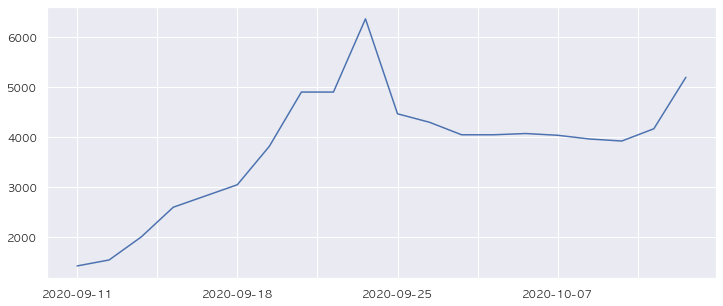

In [39]:
# Let's draw a graph 
d['adj_close'].loc[rank1_code].iloc[-20:].plot(figsize=(12,5));